In [107]:
import os
import numpy as np
import pandas as pd
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import math

In [16]:
def load_df(csv_path='train.csv', nrows=None):
    JSON_COLUMNS = ['device', 'geoNetwork', 'totals', 'trafficSource']
    
    df = pd.read_csv(csv_path, 
                     converters={column: json.loads for column in JSON_COLUMNS}, 
                     dtype={'fullVisitorId': 'str'}, # Important!!
                     nrows=nrows)
    for column in JSON_COLUMNS:
        column_as_df = json_normalize(df[column])
        column_as_df.columns = [f"{column}.{subcolumn}" for subcolumn in column_as_df.columns]
        df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)
    return df

In [17]:
train = load_df()
test = load_df("test.csv")

Loaded train.csv. Shape: (903653, 55)
Loaded test.csv. Shape: (804684, 53)


In [48]:
train['totals.transactionRevenue'].fillna(0, inplace = True)

In [54]:
train['totals.transactionRevenue'] = train['totals.transactionRevenue'].astype(float)

In [58]:
train['data_source'] = 'train'
test['data_source'] = 'test'

all_data = pd.concat([train,test], axis = 0)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


### Finding columns with only one value in it or those that have 50% data missing

In [71]:
drop_columns = [each for each in all_data.columns if len(train[each].unique()) <= 2 or all_data[each].isnull().sum() > 0.5 * all_data.shape[0]]
drop_columns = [each for each in drop_columns if each not in ['totals.transactionRevenue','data_source']]

In [76]:
all_data_upd = all_data.drop(drop_columns, axis = 1)

### Inserting date columns

In [78]:
all_data_upd['year'] = all_data_upd.date.apply(lambda x: int(str(x)[0:4]))
all_data_upd['month'] = all_data_upd.date.apply(lambda x: int(str(x)[4:6]))
all_data_upd['day'] = all_data_upd.date.apply(lambda x: int(str(x)[6:8]))

In [80]:
train_upd = all_data_upd[all_data_upd.data_source == 'train']
test_upd = all_data_upd[all_data_upd.data_source == 'test']

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

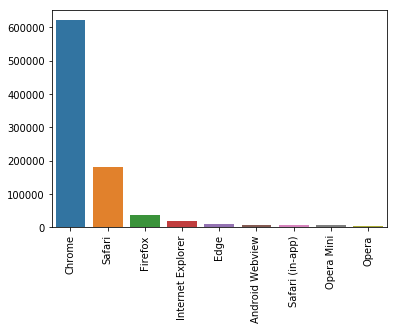

In [111]:
counts = train_upd['device.browser'].value_counts()[train_upd['device.browser'].value_counts() > 5000].values
categories = train_upd['device.browser'].value_counts()[train_upd['device.browser'].value_counts() > 5000].index
sns.barplot(x = categories, y = counts)
plt.xticks(rotation=90)

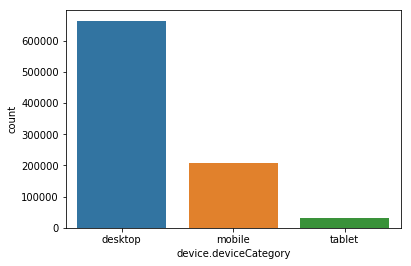

In [133]:
p = sns.countplot(train_upd['device.deviceCategory'])

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

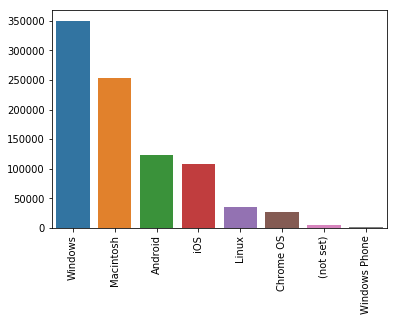

In [118]:
counts = train_upd['device.operatingSystem'].value_counts()[train_upd['device.operatingSystem'].value_counts() > 1000].values
categories = train_upd['device.operatingSystem'].value_counts()[train_upd['device.operatingSystem'].value_counts() > 1000].index
sns.barplot(x = categories, y = counts)
plt.xticks(rotation=90)

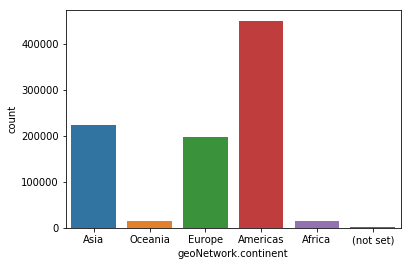

In [130]:
p = sns.countplot(train_upd['geoNetwork.continent'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]), <a list of 23 Text xticklabel objects>)

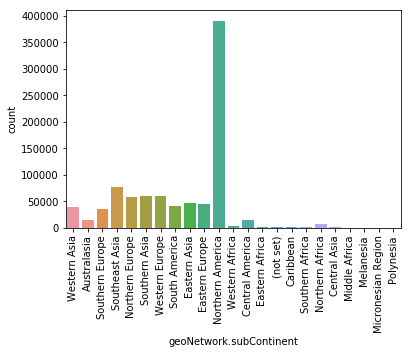

In [132]:
p = sns.countplot(train_upd['geoNetwork.subContinent'])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

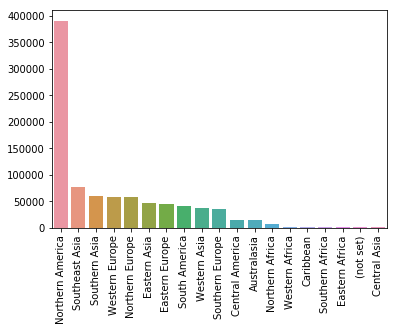

In [131]:
counts = train_upd['geoNetwork.subContinent'].value_counts()[train_upd['geoNetwork.subContinent'].value_counts() > 1000].values
categories = train_upd['geoNetwork.subContinent'].value_counts()[train_upd['geoNetwork.subContinent'].value_counts() > 1000].index
sns.barplot(x = categories, y = counts)
plt.xticks(rotation=90)

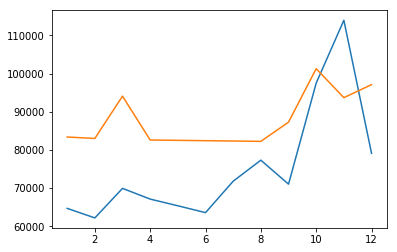

In [142]:
sns.lineplot(train_upd['month'].value_counts().index, train_upd['month'].value_counts().values)
sns.lineplot(test_upd['month'].value_counts().index, test_upd['month'].value_counts().values)

In [138]:
train_upd.head()

,channelGrouping,data_source,date,device.browser,device.deviceCategory,device.operatingSystem,fullVisitorId,geoNetwork.city,geoNetwork.continent,geoNetwork.country,geoNetwork.metro,geoNetwork.networkDomain,geoNetwork.region,geoNetwork.subContinent,sessionId,totals.hits,totals.pageviews,totals.transactionRevenue,trafficSource.campaign,trafficSource.medium,trafficSource.source,visitId,visitNumber,visitStartTime,year,month,day
0,Organic Search,train,20160902,Chrome,desktop,Windows,1131660440785968503,Izmir,Asia,Turkey,(not set),ttnet.com.tr,Izmir,Western Asia,1131660440785968503_1472830385,1,1,0.0,(not set),organic,google,1472830385,1,1472830385,2016,9,2
1,Organic Search,train,20160902,Firefox,desktop,Macintosh,377306020877927890,not available in demo dataset,Oceania,Australia,not available in demo dataset,dodo.net.au,not available in demo dataset,Australasia,377306020877927890_1472880147,1,1,0.0,(not set),organic,google,1472880147,1,1472880147,2016,9,2
2,Organic Search,train,20160902,Chrome,desktop,Windows,3895546263509774583,Madrid,Europe,Spain,(not set),unknown.unknown,Community of Madrid,Southern Europe,3895546263509774583_1472865386,1,1,0.0,(not set),organic,google,1472865386,1,1472865386,2016,9,2
3,Organic Search,train,20160902,UC Browser,desktop,Linux,4763447161404445595,not available in demo dataset,Asia,Indonesia,not available in demo dataset,unknown.unknown,not available in demo dataset,Southeast Asia,4763447161404445595_1472881213,1,1,0.0,(not set),organic,google,1472881213,1,1472881213,2016,9,2
4,Organic Search,train,20160902,Chrome,mobile,Android,27294437909732085,not available in demo dataset,Europe,United Kingdom,not available in demo dataset,unknown.unknown,not available in demo dataset,Northern Europe,27294437909732085_1472822600,1,1,0.0,(not set),organic,google,1472822600,2,1472822600,2016,9,2


In [122]:
train_upd['geoNetwork.continent'].isnull().sum()

0

In [128]:
train_upd['geoNetwork.subContinent'].value_counts()[train_upd['geoNetwork.subContinent'].value_counts() > 1000]

Northern America    390657
Southeast Asia       77800
Southern Asia        59321
Western Europe       59114
Northern Europe      58168
Eastern Asia         46919
Eastern Europe       45249
South America        41731
Western Asia         38443
Southern Europe      35780
Central America      15583
Australasia          14893
Northern Africa       7683
Western Africa        2573
Caribbean             2406
Southern Africa       2169
Eastern Africa        1927
(not set)             1468
Central Asia          1215
Name: geoNetwork.subContinent, dtype: int64